# 3.5 Video Augmentation Demo (ISL_CLSRT Samples)

This notebook demonstrates basic frame-level video augmentation using 3 sample sign language videos.  
We apply visual transformations like:
- Horizontal Flip
- Frame Skipping
- Center Cropping

✅ These techniques are useful for data augmentation in gesture recognition and sign language translation models.


In [ ]:
# !pip install opencv-python


In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
# Update with your actual folder path
video_dir = '/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos'

video_files = [
    'are you free today (2).mp4',
    'bring water for me (1).MP4',
    'could you please talk slower (1).mp4'
]

video_paths = [os.path.join(video_dir, f) for f in video_files]


In [13]:
def display_frame(video_path, title='Original Frame'):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print("Failed to read video:", video_path)


## Sample Frames from Original Videos

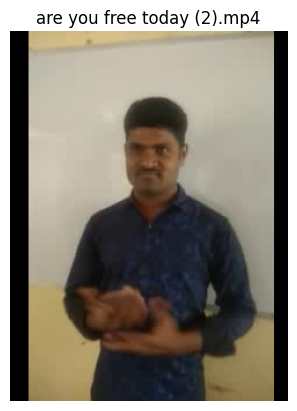

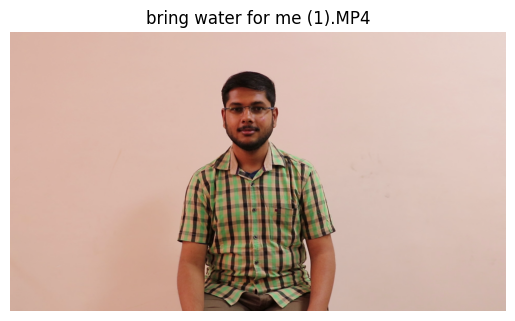

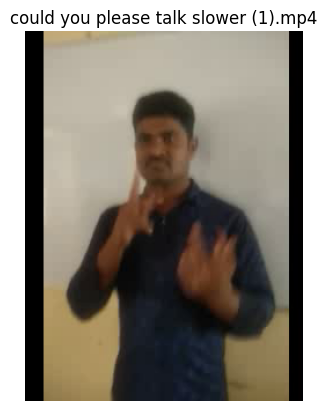

In [14]:
for path in video_paths:
    if os.path.exists(path):
        display_frame(path, title=os.path.basename(path))
    else:
        print(f"Video file not found: {path}")

## Horizontal Flip Augmentation

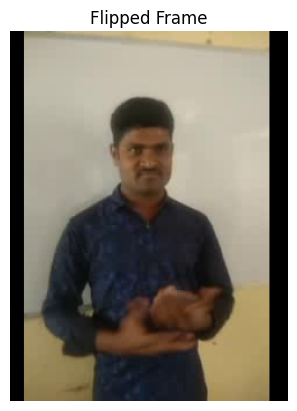

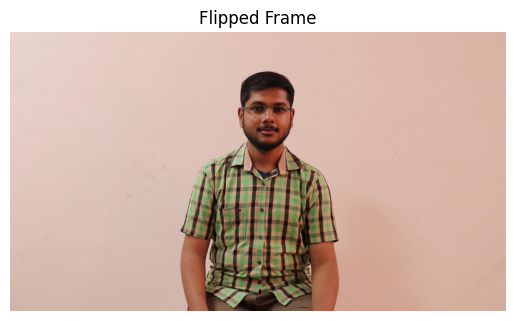

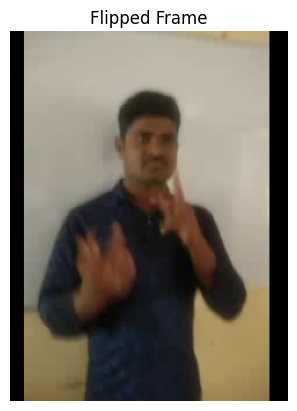

In [15]:
def display_flipped_frame(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        flipped = cv2.flip(frame, 1)
        flipped_rgb = cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)
        plt.imshow(flipped_rgb)
        plt.title("Flipped Frame")
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read video for flipping: {video_path}")

for path in video_paths:
    if os.path.exists(path):
        display_flipped_frame(path)
    else:
        print(f"Video file not found for flipping: {path}")

## Frame Skipping

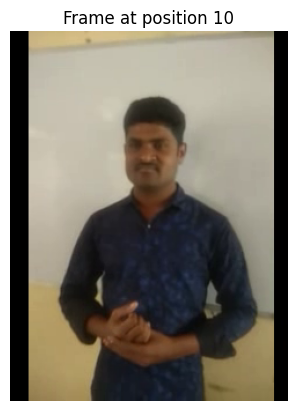

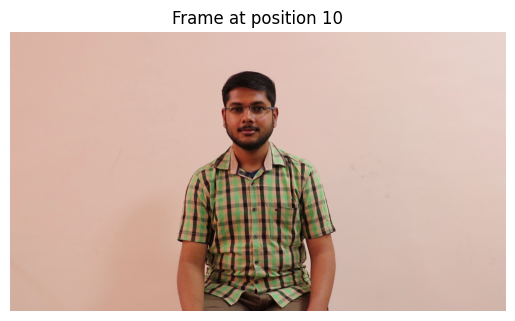

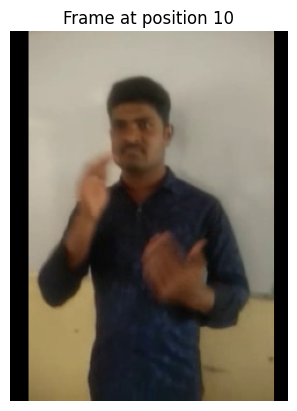

In [16]:
def extract_frame(video_path, skip=10):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, skip)
    ret, frame = cap.read()
    cap.release()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(f'Frame at position {skip}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read frame at position {skip} from video: {video_path}")

for path in video_paths:
    if os.path.exists(path):
        extract_frame(path, skip=10)
    else:
        print(f"Video file not found for frame skipping: {path}")

## Center Crop

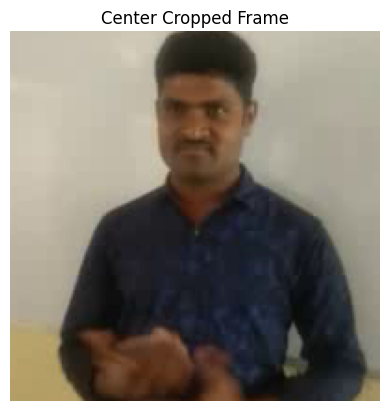

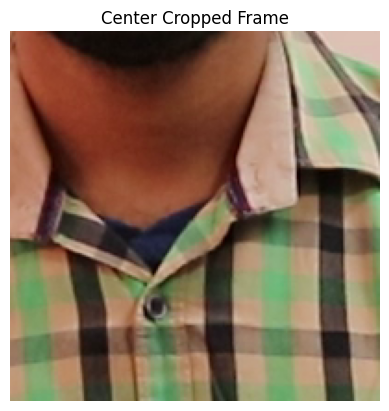

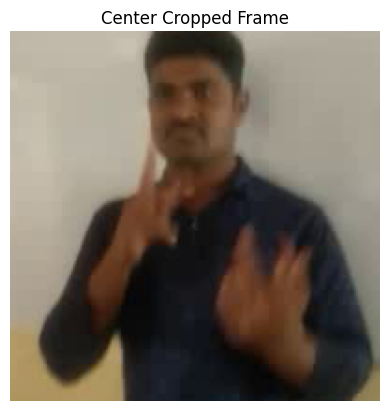

In [19]:
def center_crop(frame, crop_size=(200, 200)):
    h, w, _ = frame.shape
    ch, cw = crop_size
    y1 = h//2 - ch//2
    x1 = w//2 - cw//2
    return frame[y1:y1+ch, x1:x1+cw]

def display_cropped(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        cropped = center_crop(frame)
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
        plt.imshow(cropped_rgb)
        plt.title('Center Cropped Frame')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read video for cropping: {video_path}")

for path in video_paths:
    if os.path.exists(path):
        display_cropped(path)
    else:
        print(f"Video file not found for cropping: {path}")

## Upper Body Crop Augmentation

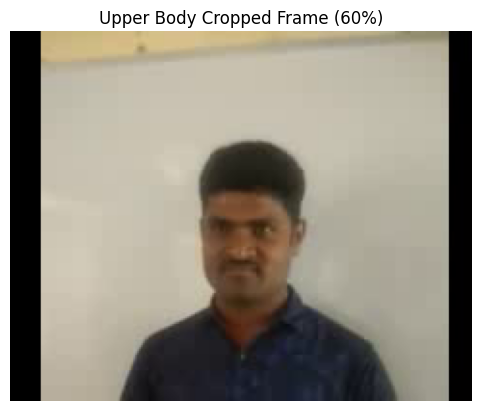

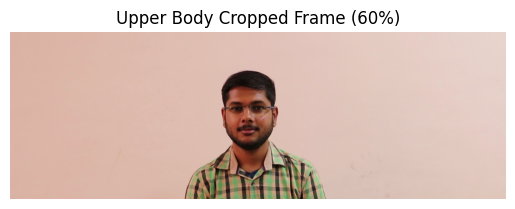

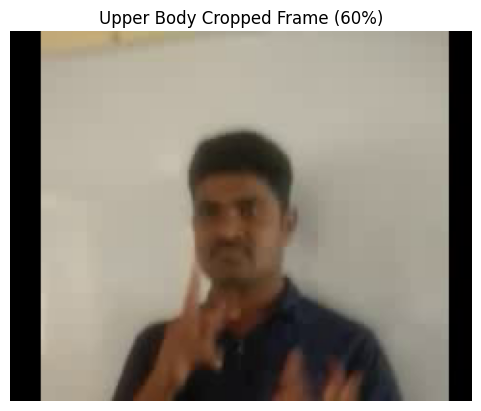

In [20]:
def upper_body_crop(frame, crop_height_ratio=0.6):
    """
    Crops the upper portion of a video frame.

    Args:
        frame (np.ndarray): The input frame.
        crop_height_ratio (float): The ratio of the frame height to keep from the top.
                                   For example, 0.6 keeps the top 60%.
    Returns:
        np.ndarray: The cropped frame.
    """
    h, w, _ = frame.shape
    crop_h = int(h * crop_height_ratio)
    return frame[0:crop_h, 0:w]

def display_upper_body_cropped(video_path, crop_height_ratio=0.6):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        cropped = upper_body_crop(frame, crop_height_ratio)
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
        plt.imshow(cropped_rgb)
        plt.title(f'Upper Body Cropped Frame ({int(crop_height_ratio*100)}%)')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read video for upper body cropping: {video_path}")

for path in video_paths:
    if os.path.exists(path):
        display_upper_body_cropped(path)
    else:
        print(f"Video file not found for upper body cropping: {path}")

In [ ]:
# !pip install opencv-python

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Update with your actual folder path
video_dir = '/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos'

video_files = [
    'are you free today (2).mp4',
    'bring water for me (1).MP4',
    'could you please talk slower (1).mp4'
]

video_paths = [os.path.join(video_dir, f) for f in video_files]

def display_frame(video_path, title='Original Frame'):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print("Failed to read video:", video_path)

def display_flipped_frame(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        flipped = cv2.flip(frame, 1)
        flipped_rgb = cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)
        plt.imshow(flipped_rgb)
        plt.title("Flipped Frame")
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read video for flipping: {video_path}")

def extract_frame(video_path, skip=10):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, skip)
    ret, frame = cap.read()
    cap.release()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(f'Frame at position {skip}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read frame at position {skip} from video: {video_path}")

def center_crop(frame, crop_size=(200, 200)):
    h, w, _ = frame.shape
    ch, cw = crop_size
    y1 = h//2 - ch//2
    x1 = w//2 - cw//2
    return frame[y1:y1+ch, x1:x1+cw]

def display_cropped(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        cropped = center_crop(frame)
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
        plt.imshow(cropped_rgb)
        plt.title('Center Cropped Frame')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read video for cropping: {video_path}")

def upper_body_crop(frame, crop_height_ratio=0.6):
    """
    Crops the upper portion of a video frame.

    Args:
        frame (np.ndarray): The input frame.
        crop_height_ratio (float): The ratio of the frame height to keep from the top.
                                   For example, 0.6 keeps the top 60%.
    Returns:
        np.ndarray: The cropped frame.
    """
    h, w, _ = frame.shape
    crop_h = int(h * crop_height_ratio)
    return frame[0:crop_h, 0:w]

def display_upper_body_cropped(video_path, crop_height_ratio=0.6):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if ret:
        cropped = upper_body_crop(frame, crop_height_ratio)
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR_RGB)
        plt.imshow(cropped_rgb)
        plt.title(f'Upper Body Cropped Frame ({int(crop_height_ratio*100)}%)')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read video for upper body cropping: {video_path}")


# Execution calls for each function
for path in video_paths:
    if os.path.exists(path):
        display_frame(path, title=os.path.basename(path))
        display_flipped_frame(path)
        extract_frame(path, skip=10)
        display_cropped(path)
        display_upper_body_cropped(path)
    else:
        print(f"Video file not found: {path}")